In [1]:
import pandas as pd

df = pd.read_csv("../data/AAPL_with_indicators.csv", index_col=0, parse_dates=True)
df = df.dropna()  # ważne – usuwamy wiersze z NaN po rolling()


C:\Users\olafg\AppData\Local\Temp\ipykernel_40292\2659031095.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/AAPL_with_indicators.csv", index_col=0, parse_dates=True)


In [2]:
for lag in range(1, 6):  # 5 dni opóźnienia
    df[f"lag_{lag}"] = df["Close"].shift(lag)


In [3]:
df["rolling_mean_5"] = df["Close"].rolling(window=5).mean()
df["rolling_std_5"] = df["Close"].rolling(window=5).std()


In [10]:
df["target"] = df["Close"].shift(-1)  # lub .pct_change().shift(-1) dla % zmiany
print(X_train.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'daily_return', 'volatility',
       'SMA_20', 'EMA_20', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'rolling_mean_5', 'rolling_std_5'],
      dtype='object')


In [5]:
df = df.dropna()


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Regresja liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
import numpy as np

def print_metrics(y_true, y_pred, label):
    print(f"--- {label} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")


--- Linear Regression ---
MAE: 2.185047808251447
RMSE: 2.9376825910485107
--- Random Forest ---
MAE: 19.61304133921017
RMSE: 26.36167005711778


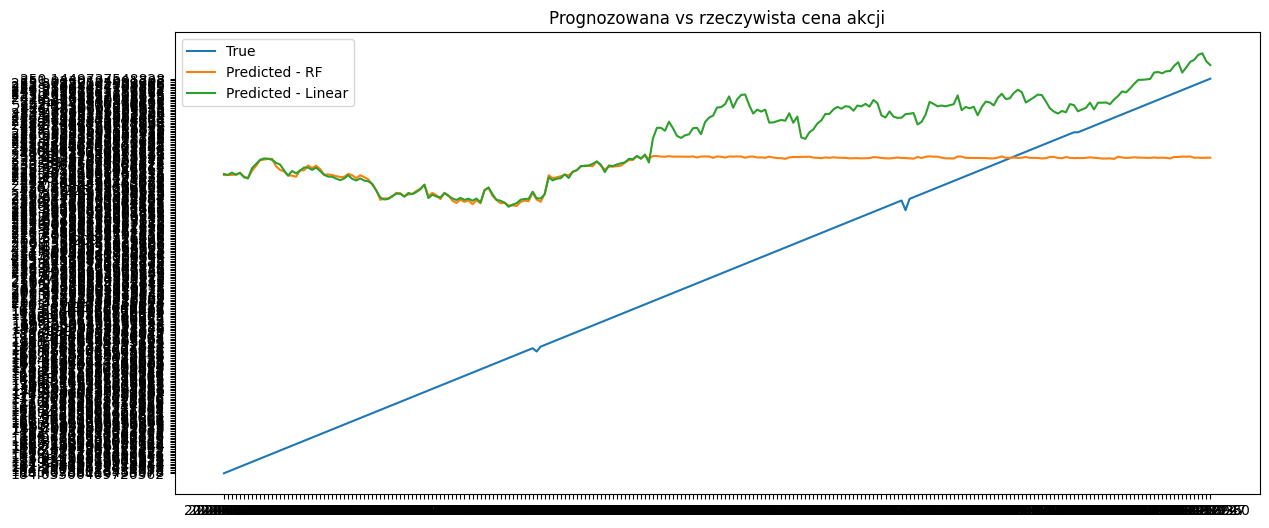

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label="True")
plt.plot(y_test.index, y_pred_rf, label="Predicted - RF")
plt.plot(y_test.index, y_pred_lr, label="Predicted - Linear")
plt.title("Prognozowana vs rzeczywista cena akcji")
plt.legend()
plt.show()
